In [ ]:
## This notebook is used to average yearly sea level pressure data into case year data
## Also used to plot the case year data, and the case year compared to climatology

## created by Kendra Herweck

In [1]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob

## Climatological Avg

In [2]:
filename_list=[]
for i in range(1980,2021):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list,concat_dim='time')
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 41, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.98e+03 1.981e+03 1.982e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    slp      (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [4]:
clim_avg = combined_ds.mean('time')
print(clim_avg['slp'].values)

[[101454.94969512 101454.94969512 101454.94969512 ... 101454.94969512
  101454.94969512 101454.94969512]
 [101471.94054878 101471.96341463 101471.98780488 ... 101471.86737805
  101471.8902439  101471.9222561 ]
 [101488.78963415 101488.83841463 101488.88567073 ... 101488.64329268
  101488.69664634 101488.75      ]
 ...
 [101017.06402439 101017.00609756 101017.98170732 ... 101015.22103659
  101015.5777439  101016.31402439]
 [101005.93445122 101006.60518293 101007.19359756 ... 101004.40091463
  101005.04878049 101005.40396341]
 [100996.06859756 100996.76219512 100996.92682927 ... 100994.25152439
  100995.04573171 100995.3902439 ]]


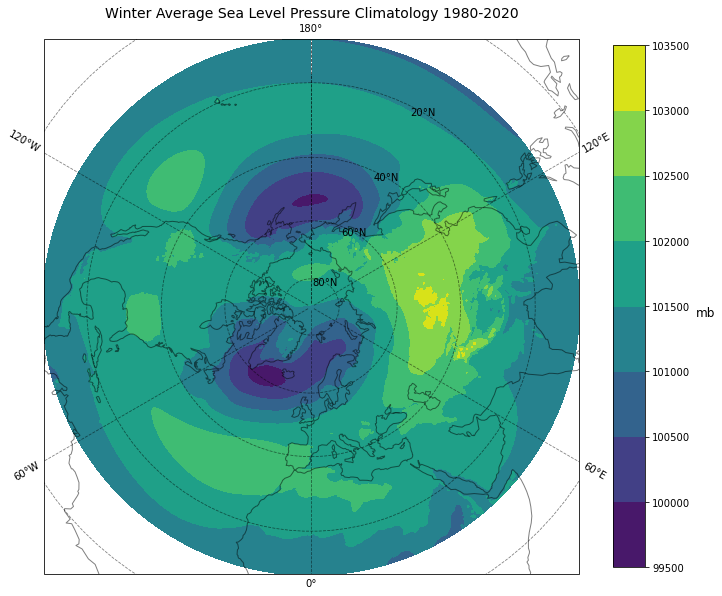

In [5]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

press=clim_avg['slp'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, press, transform=ccrs.PlateCarree())
plt.title('Winter Average Sea Level Pressure Climatology 1980-2020', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC Years Avg

In [6]:
filename_list=[]
for i in (1950,1951,1952,1955,1958,1959,1961,1964,1966,1968,1970,1971,1974,1976,1977,1979,1981,1984,1987,1989,1990,1993,
      1995,1997,1998,1999,2002,2005,2007,2010,2011,2012,2015,2016,2019,2020):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 36, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.95e+03 1.951e+03 1.952e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    slp      (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [7]:
lowsic_avg = combined_ds.mean('time')
print(lowsic_avg['slp'].values)

[[101524.97395833 101524.97395833 101524.97395833 ... 101524.97395833
  101524.97395833 101524.97395833]
 [101541.56597222 101541.59027778 101541.61458333 ... 101541.51041667
  101541.52604167 101541.54513889]
 [101558.07118056 101558.10763889 101558.15104167 ... 101557.93402778
  101557.97569444 101558.03125   ]
 ...
 [101007.97048611 101007.93576389 101008.90972222 ... 101005.96701389
  101006.38368056 101007.19097222]
 [100997.34201389 100998.05208333 100998.64930556 ... 100995.60416667
  100996.3125     100996.75      ]
 [100987.88020833 100988.63541667 100988.83333333 ... 100985.890625
  100986.73958333 100987.140625  ]]


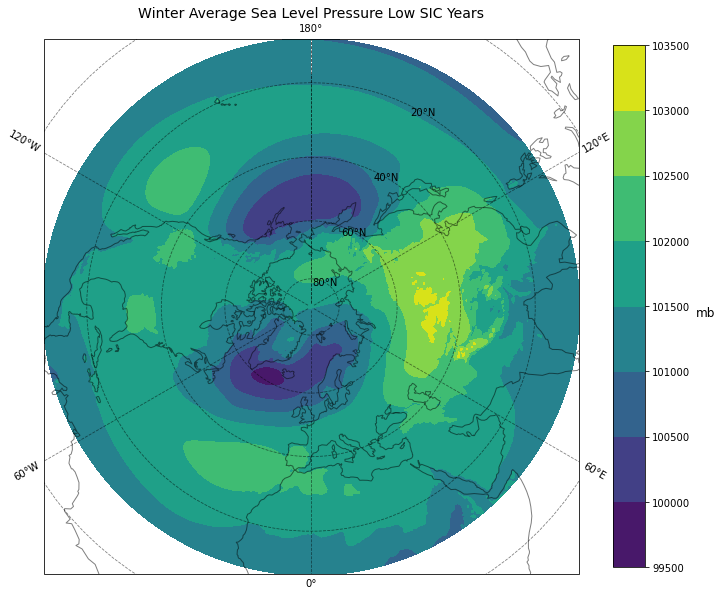

In [8]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

press=lowsic_avg['slp'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, press, transform=ccrs.PlateCarree())
plt.title('Winter Average Sea Level Pressure Low SIC Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & EP Nino Avg

In [9]:
filename_list=[]
for i in (1952,1970,1977,1987,1998,2007,2012):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 7, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.977e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    slp      (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [10]:
lowsic_ep_avg = combined_ds.mean('time')
print(lowsic_ep_avg['slp'].values)

[[101892.03571429 101892.03571429 101892.03571429 ... 101892.03571429
  101892.03571429 101892.03571429]
 [101912.52678571 101912.52678571 101912.52678571 ... 101912.52678571
  101912.50892857 101912.51785714]
 [101932.66071429 101932.64285714 101932.67857143 ... 101932.64285714
  101932.63392857 101932.65178571]
 ...
 [101034.38392857 101034.50892857 101035.58928571 ... 101032.07142857
  101032.58035714 101033.5       ]
 [101023.17857143 101024.01785714 101024.74107143 ... 101021.125
  101021.91964286 101022.47321429]
 [101013.08035714 101013.9375     101014.22321429 ... 101010.75892857
  101011.71428571 101012.25      ]]


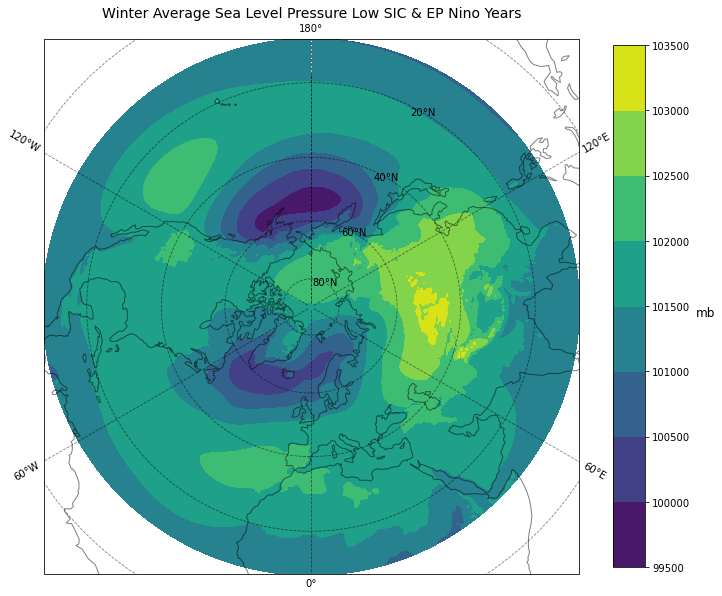

In [11]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

press=lowsic_ep_avg['slp'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, press, transform=ccrs.PlateCarree())
plt.title('Winter Average Sea Level Pressure Low SIC & EP Nino Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & CP Nino Avg

In [12]:
#Years: 1958,1959,1964,1966,1995,2005,2010,2015,2016,2020

filename_list=[]
for i in (1958,1959,1964,1966,1995,2005,2010,2015,2016,2020):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 10, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.958e+03 1.959e+03 1.964e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    slp      (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [13]:
lowsic_cp_avg = combined_ds.mean('time')
print(lowsic_cp_avg['slp'].values)

[[101533.88125 101533.88125 101533.88125 ... 101533.88125 101533.88125
  101533.88125]
 [101549.3625  101549.40625 101549.41875 ... 101549.3     101549.31875
  101549.3375 ]
 [101564.875   101564.925   101564.9625  ... 101564.7     101564.7625
  101564.81875]
 ...
 [101027.76875 101027.33125 101027.88125 ... 101026.95    101026.98125
  101027.4125 ]
 [101016.59375 101016.875   101017.0375  ... 101016.0375  101016.38125
  101016.425  ]
 [101006.6125  101006.925   101006.6875  ... 101005.8     101006.25625
  101006.2625 ]]


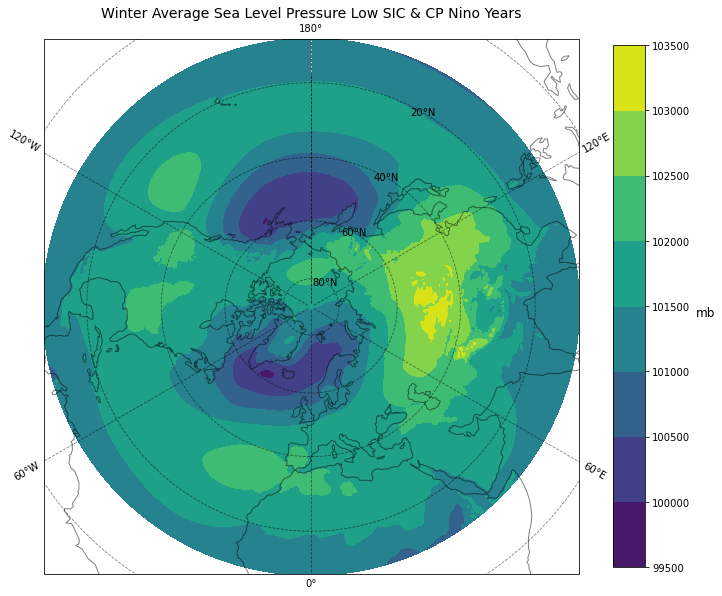

In [14]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

press=lowsic_cp_avg['slp'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, press, transform=ccrs.PlateCarree())
plt.title('Winter Average Sea Level Pressure Low SIC & CP Nino Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All CP Nino Years

In [15]:
##Years: 1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020

filename_list=[]
for i in (1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)


<xarray.Dataset>
Dimensions:  (time: 16, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.954e+03 1.958e+03 1.959e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    slp      (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [16]:
cp_avg = combined_ds.mean('time')
print(cp_avg['slp'].values)

[[101444.7890625  101444.7890625  101444.7890625  ... 101444.7890625
  101444.7890625  101444.7890625 ]
 [101459.64453125 101459.69140625 101459.71875    ... 101459.55078125
  101459.578125   101459.609375  ]
 [101474.609375   101474.6796875  101474.73046875 ... 101474.37109375
  101474.45703125 101474.53515625]
 ...
 [101019.79296875 101019.51171875 101020.23828125 ... 101018.546875
  101018.7109375  101019.2734375 ]
 [101008.69921875 101009.140625   101009.4921875  ... 101007.71875
  101008.19140625 101008.38671875]
 [100998.82421875 100999.296875   100999.23046875 ... 100997.55859375
  100998.16796875 100998.31640625]]


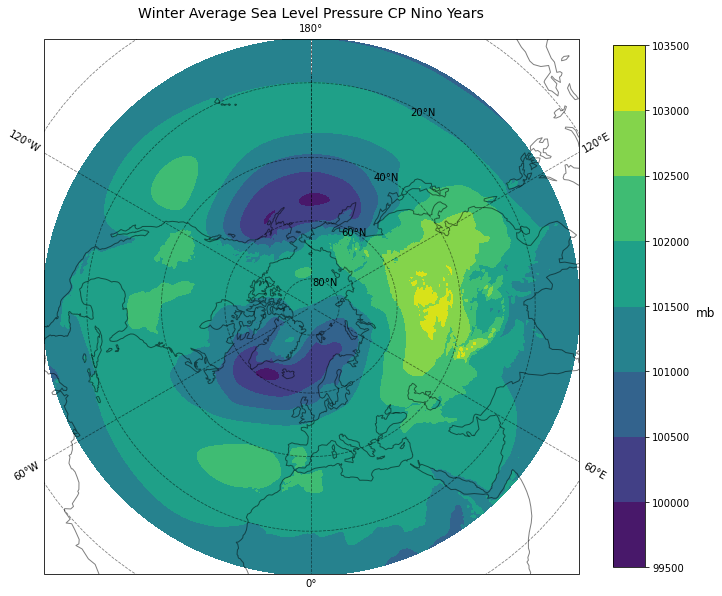

In [17]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

press=cp_avg['slp'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, press, transform=ccrs.PlateCarree())
plt.title('Winter Average Sea Level Pressure CP Nino Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All EP Nino Years

In [18]:
##Years: 1952,1970,1973,1977,1983,1987,1998,2007,2012

filename_list=[]
for i in (1952,1970,1973,1977,1983,1987,1998,2007,2012):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 9, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.973e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    slp      (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [19]:
ep_avg = combined_ds.mean('time')
print(ep_avg['slp'].values)

[[101775.18055556 101775.18055556 101775.18055556 ... 101775.18055556
  101775.18055556 101775.18055556]
 [101794.97222222 101794.98611111 101795.         ... 101794.9375
  101794.9375     101794.95833333]
 [101814.53472222 101814.54861111 101814.59027778 ... 101814.45833333
  101814.47916667 101814.50694444]
 ...
 [101056.71527778 101056.70138889 101057.66666667 ... 101054.8125
  101055.19444444 101055.96527778]
 [101045.55555556 101046.26388889 101046.84027778 ... 101043.89583333
  101044.5625     101044.97222222]
 [101035.49305556 101036.24305556 101036.375      ... 101033.56944444
  101034.38888889 101034.79166667]]


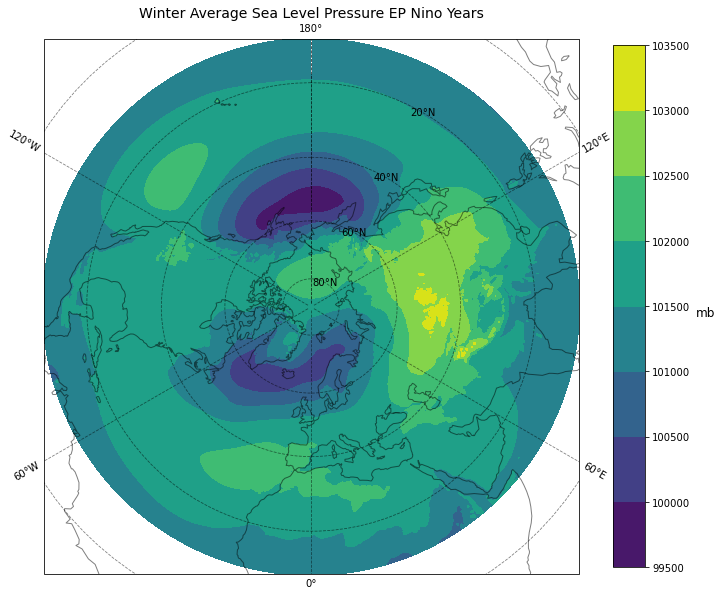

In [20]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

press=ep_avg['slp'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, press, transform=ccrs.PlateCarree())
plt.title('Winter Average Sea Level Pressure EP Nino Years', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Difference Plots

### Low SIC - Climatology

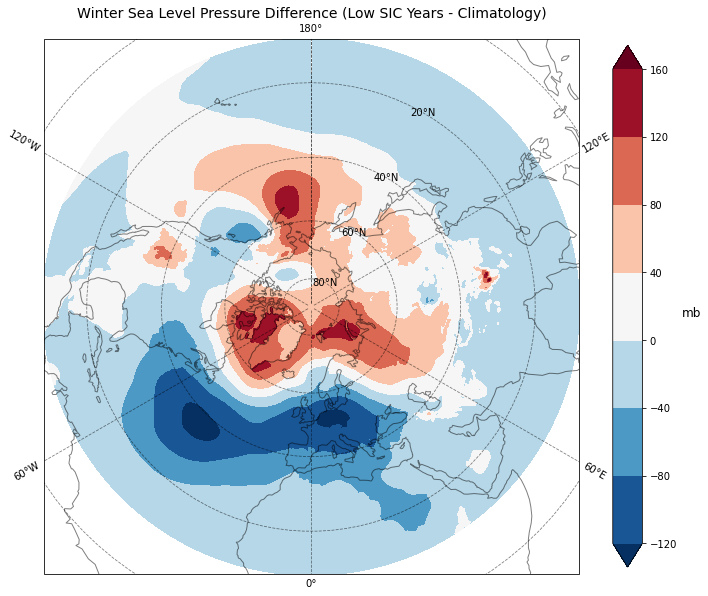

In [22]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=lowsic_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Sea Level Pressure Difference (Low SIC Years - Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### EP Nino - Climatology

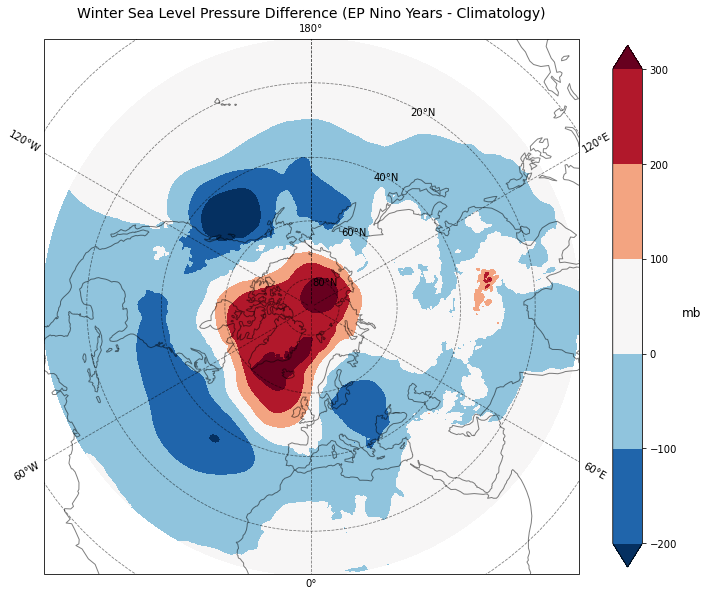

In [23]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=ep_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Sea Level Pressure Difference (EP Nino Years - Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### CP Nino - Climatology

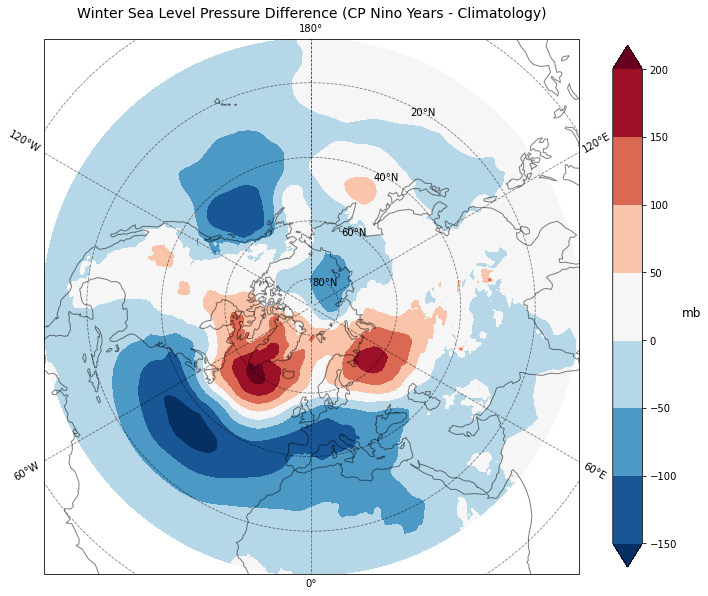

In [24]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=cp_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Sea Level Pressure Difference (CP Nino Years - Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & EP Nino - Climatology

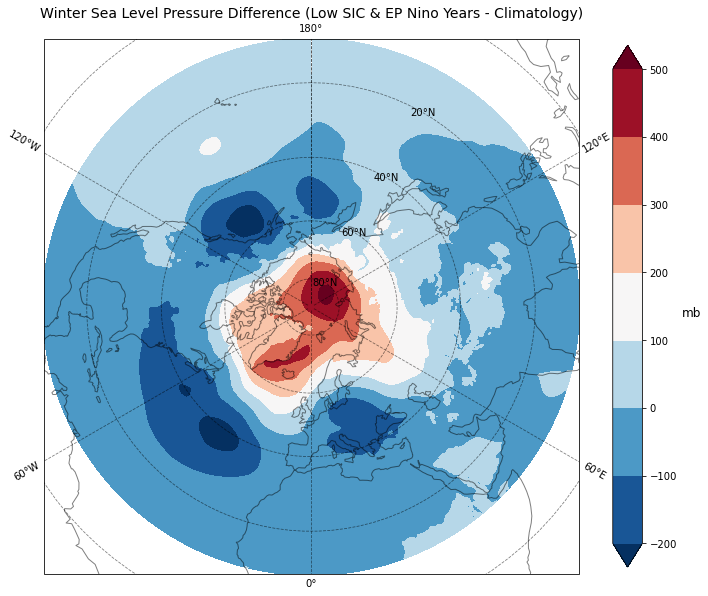

In [25]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=lowsic_ep_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Sea Level Pressure Difference (Low SIC & EP Nino Years - Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & CP Nino - Climatology

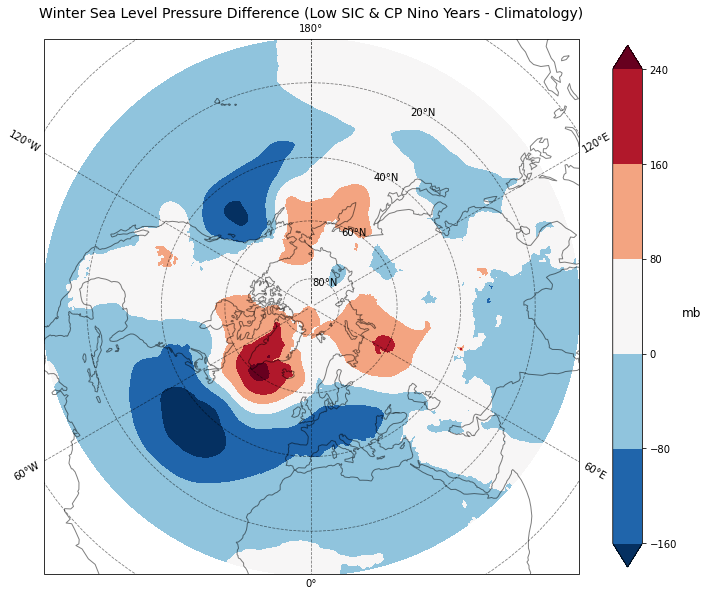

In [26]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=lowsic_cp_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Sea Level Pressure Difference (Low SIC & CP Nino Years - Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Difference Plots - US Focus

### Low SIC - Climatology

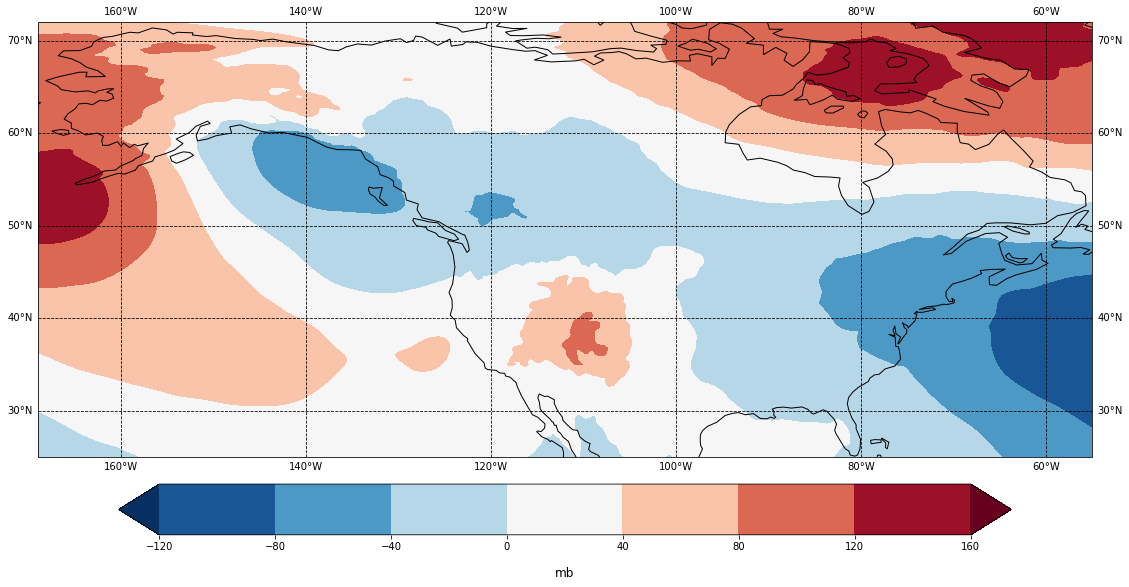

In [28]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=lowsic_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### EP Nino - Climatology

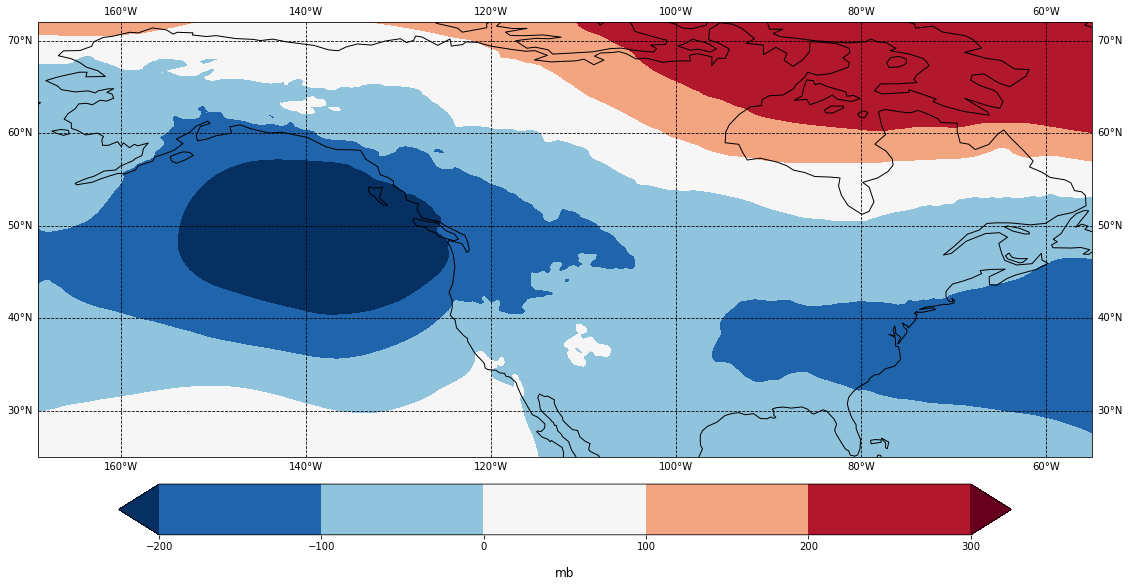

In [30]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=ep_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### CP Nino - Climatology

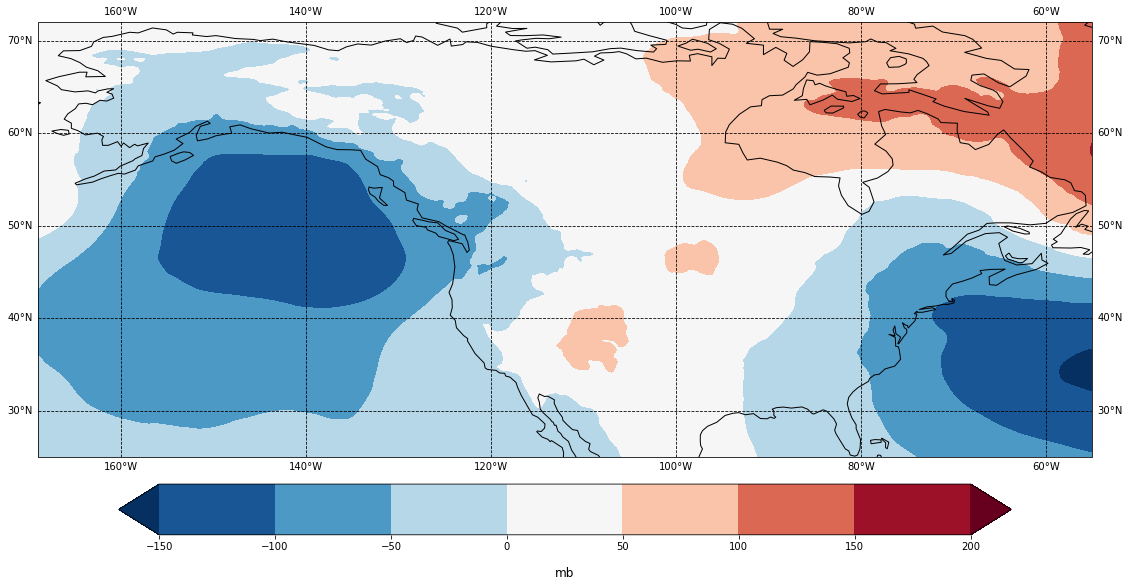

In [36]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=cp_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & EP Nino - Climatology

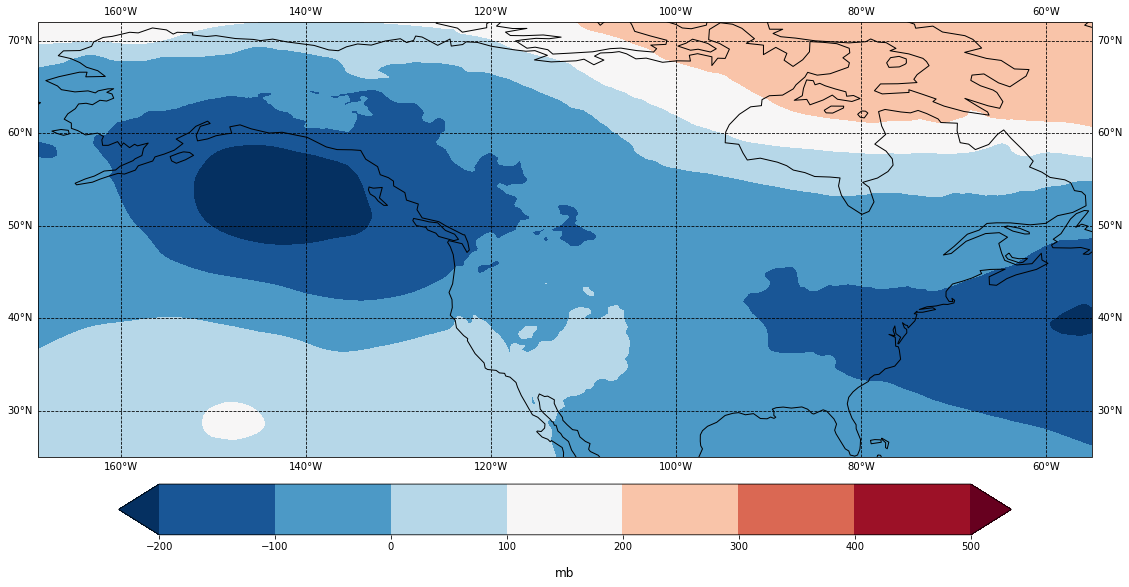

In [33]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=lowsic_ep_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & CP Nino - Climatology

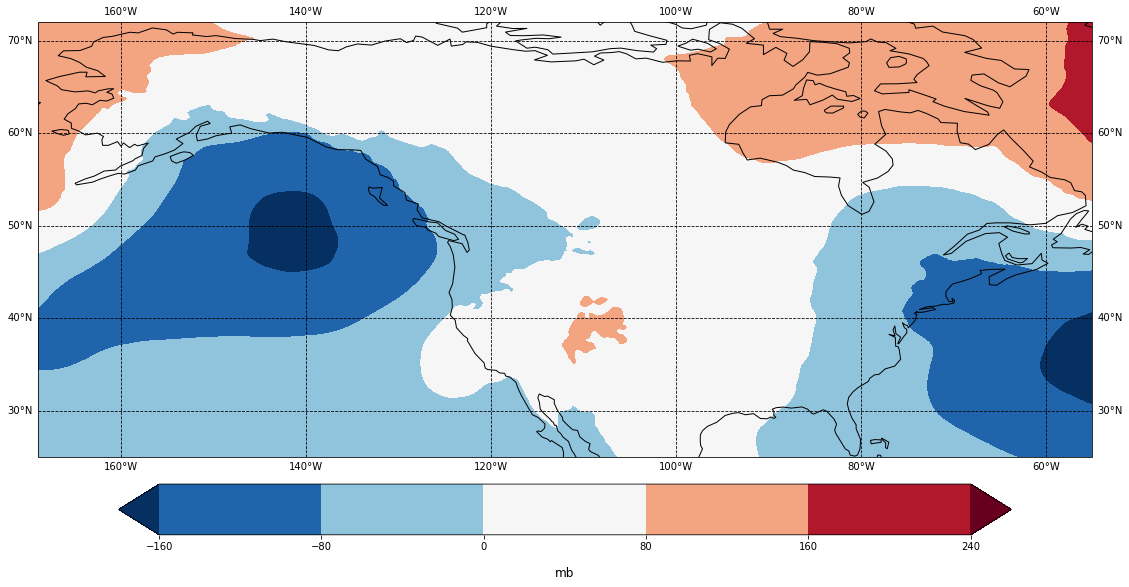

In [35]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

slp1=clim_avg['slp'][:,:]  ## 
slp2=lowsic_cp_avg['slp'][:,:]  ## 
slp = slp2-slp1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-3, 3, 25)
#plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, slp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mb',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())